In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [2]:

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()


x_train, x_test = x_train / 255.0, x_test / 255.0


print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [5]:
model = models.Sequential([

    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),


    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),


    layers.Conv2D(64, (3, 3), activation='relu'),


    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 44ms/step - accuracy: 0.3404 - loss: 1.7908 - val_accuracy: 0.5262 - val_loss: 1.3278
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.5560 - loss: 1.2435 - val_accuracy: 0.6042 - val_loss: 1.1277
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.6296 - loss: 1.0486 - val_accuracy: 0.6414 - val_loss: 1.0155
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.6675 - loss: 0.9540 - val_accuracy: 0.6502 - val_loss: 0.9936
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.6889 - loss: 0.8800 - val_accuracy: 0.6797 - val_loss: 0.9196
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 44ms/step - accuracy: 0.7115 - loss: 0.8222 - val_accuracy: 0.6878 - val_loss: 0.9047
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.7290 - loss: 0.7779 - val_accuracy: 0.6964 - val_loss: 0.8849
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.7403 -

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")


313/313 - 3s - 10ms/step - accuracy: 0.7002 - loss: 0.8983
Test accuracy: 0.7002000212669373


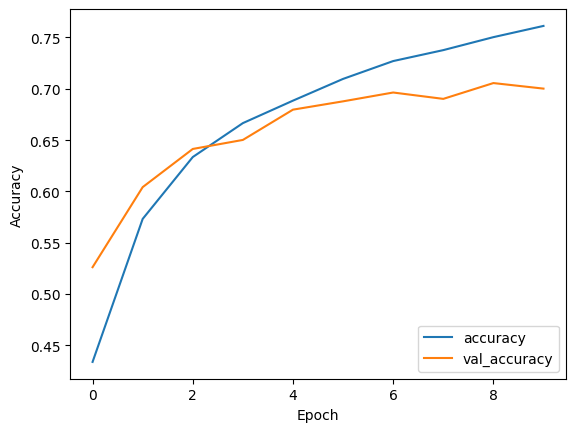

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


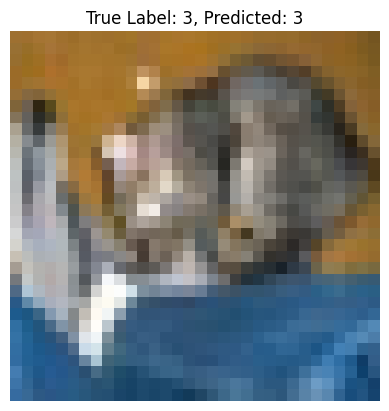

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Test a single image from the test set
def test_single_image(index):

    test_image = x_test[index]
    true_label = y_test[index][0]

    # Predict the class
    prediction = model.predict(test_image[np.newaxis, ...])
    predicted_label = np.argmax(prediction)

    # Display the test image
    plt.imshow(test_image)
    plt.title(f"True Label: {true_label}, Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()


test_single_image(0)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


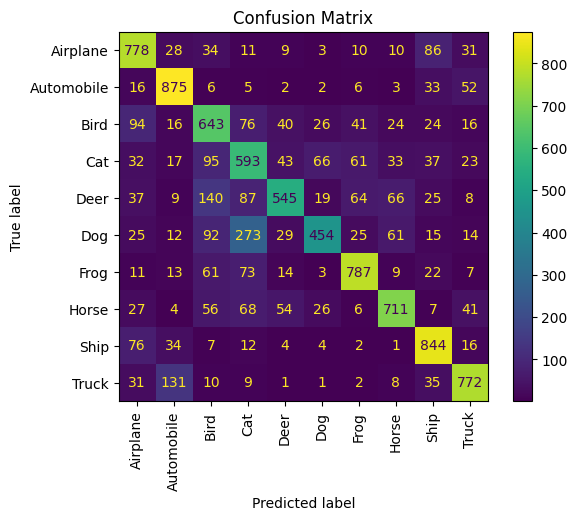

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict the classes for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot predictions to class labels
y_true = y_test.flatten()  # Flatten true labels to match the prediction shape

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[
    "Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"
])
disp.plot(cmap='viridis', xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()
